# HW1: Who is the best singer ever? Rihanna or Mariah?


<img width=600 height=400 src="http://static.idolator.com/uploads/2015/02/rihanna-mariah.jpg"/>

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A **single** is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will scrape both Wikipedia and Billboard Magazine to try to understand how the public's taste in music has evolved. You will do this by learning about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to scrape the web pages, clean the data, and visualize the performance of the artists and their songs. Finally, you'll find some "features" which might predict performance on the year end charts from the weekly ones.

(Image credit: http://www.idolator.com/7579645/rihanna-mariah-carey-vision-of-love-made-her-want-to-do-music)

## **This homework is due Thursday 24th September, at 11:59PM.**

We will use the **LAST COMMIT** BEFORE 11:59PM on Thursday Sep 24th 2015, on the **hw1** branch, of your repository `cs109-students/githubusername-2015hw` as your submission.

The homework will help develop your skills in:

- web page scraping
- data cleaning and manipulation
- pandas
- simple exploratory data visualization
- thinking about data and what features might be used to make predictions

You should have worked through Lab 1 (the pandas and python parts) and Lab 2. 

The table of contents below shows youthe structure of the homework. The headings with numbers like 1.2 and 3.2 are the ones that need to be answered. At lot of code is provided for you in this homework. DO NOT simply run it. Understand it. I promise that if you dont, you will have trouble in the parts that you have to code.

Finally, start soon. This is not a very long homework, but we are at the point in the semester that logistical issues like git flow and python running might hold you up.

#Table of Contents
* [HW1: Who is the best singer ever? Rihanna or Mariah?](#HW1:-Who-is-the-best-singer-ever?-Rihanna-or-Mariah?)
	* [**This homework is due Thursday 24th September, at 11:59PM.**](#**This-homework-is-due-Thursday-24th-September,-at-11:59PM.**)
	* [Q1. Scraping Wikipedia for Billboard Top 100.](#Q1.-Scraping-Wikipedia-for-Billboard-Top-100.)
		* [Scraping Wikipedia for Billboard singles](#Scraping-Wikipedia-for-Billboard-singles)
			* [Parsing the Billboard Wikipedia page for 1970](#Parsing-the-Billboard-Wikipedia-page-for-1970)
			* [1.1 Generalize the previous: Scrape wikipedia from 1992 to 2014](#1.1-Generalize-the-previous:-Scrape-wikipedia-from-1992-to-2014)
			* [1.2 Clean data and save a json file of information from the scraped files](#1.2-Clean-data-and-save-a-json-file-of-information-from-the-scraped-files)
		* [Construct a year-song-singer dataframe from the yearly information](#Construct-a-year-song-singer-dataframe-from-the-yearly-information)
			* [Construct a panel and flatten it](#Construct-a-panel-and-flatten-it)
			* [Cleaning data: the correct datatypes](#Cleaning-data:-the-correct-datatypes)
	* [Q2. Scraping and Constructing: Information about Artists, Bands and Genres from Wikipedia](#Q2.-Scraping-and-Constructing:-Information-about-Artists,-Bands-and-Genres-from-Wikipedia)
		* [Scrape information about artists from wikipedia](#Scrape-information-about-artists-from-wikipedia)
			* [Pulling and saving the data](#Pulling-and-saving-the-data)
			* [2.1 Extract information about singers and bands](#2.1-Extract-information-about-singers-and-bands)
			* [Merging this information in](#Merging-this-information-in)
			* [2.2 Split out the genres](#2.2-Split-out-the-genres)
	* [Q3. Exploratory Data Analysis (EDA)](#Q3.-Exploratory-Data-Analysis-%28EDA%29)
		* [What has been the trajectory of various genres in the popular zeitgeist?](#What-has-been-the-trajectory-of-various-genres-in-the-popular-zeitgeist?)
			* [3.1 Plot a horizontal bar chart of the top 30 genres](#3.1-Plot-a-horizontal-bar-chart-of-the-top-30-genres)
			* [3.2 Make a small multiples plot of the 24 most popular genres](#3.2-Make-a-small-multiples-plot-of-the-24-most-popular-genres)
		* [Who are the highest quality singers?](#Who-are-the-highest-quality-singers?)
			* [3.3 What if we used a different metric?](#3.3-What-if-we-used-a-different-metric?)
			* [The age at which singers achieve their top ranking.](#The-age-at-which-singers-achieve-their-top-ranking.)
			* [3.4 At what year since inception do bands reach their top rankings?](#3.4-At-what-year-since-inception-do-bands-reach-their-top-rankings?)
	* [Q4: Billboard Magazine: year end results from weekly results](#Q4:-Billboard-Magazine:-year-end-results-from-weekly-results)
		* [Get the end year results, and results from all saturdays of the year.](#Get-the-end-year-results,-and-results-from-all-saturdays-of-the-year.)
			* [Get the data](#Get-the-data)
			* [4.1 Parse the HTML and save the song information](#4.1-Parse-the-HTML-and-save-the-song-information)
		* [Get winning songs, and see how they do in all these weeks](#Get-winning-songs,-and-see-how-they-do-in-all-these-weeks)
			* [4.2 Plot the mean rank(y axis) against the final, year-end rank(x-axis)](#4.2-Plot-the-mean-rank%28y-axis%29-against-the-final,-year-end-rank%28x-axis%29)
		* [Add losers in and see what features may be used to distinguish winners from losers](#Add-losers-in-and-see-what-features-may-be-used-to-distinguish-winners-from-losers)
			* [4.3 Make a scatterplot matrix of these features, color coded by winners/losers](#4.3-Make-a-scatterplot-matrix-of-these-features,-color-coded-by-winners/losers)


---

Python depends on packages for most of its functionality; these can be either built-in (such as sys), or third-party (like all the packages below). Either way you need to import the packages you need before using them.

In [152]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import requests
import re
import json
from tqdm.notebook import tqdm
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
%load_ext pycodestyle_magic

We use [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) to give us a nicer default color palette, with our plots being of large (`poster`) size and with a white-grid background. (see the code above).

## Q1. Scraping Wikipedia for Billboard Top 100.

In this question you will scrape wikipedia for Billboard's top 100. You may use any python scraping software you like. We especially recommend Beautiful Soup and PyQuery.

### Scraping Wikipedia for Billboard singles

We'll be using one of two libraries to transform HTML content into Python data structures. One is [BeautifulSoup](http://www.crummy.com/software/BeautifulSoup/) and the other is [PyQuery](https://pythonhosted.org/pyquery/).

You can choose which one you want to use.

PyQuery is recommended for people who have used [jQuery](https://jquery.com/) before, or who feel more comfortable using CSS selectors. BeautifulSoup on the other hand might be a better  fit for people who are familiar with Python. Either package will make the job of parsing HTML documents easier.

In [4]:
from pyquery import PyQuery as pq
from bs4 import BeautifulSoup
# The "requests" library makes working with HTTP requests easier
# than the built-in urllib libraries.
import requests

#### Parsing the Billboard Wikipedia page for 1970

We'll use python's `requests` module to obtain the web page at http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1970. From this web page we'll extract the top 100 singles and their rankings. We'll then create a list of [dictionaries](https://docs.python.org/2/tutorial/datastructures.html#dictionaries), 100 of them to be precise, with entries like `{'url': '/wiki/Sugarloaf_(band)', 'ranking': 30, 'band_singer': 'Sugarloaf', 'title': 'Green-Eyed Lady'}`. If you look at that web page, you will see that there is a link for every song, from which you can get the `url` of the singer or band. We will use these links later to scrape information about the singer or band. From the listing we can also get the band or singer name `band_singer`, and `title` of the song.

We start by making a [GET](http://www.w3schools.com/tags/ref_httpmethods.asp) request to pull in the Billboard page from Wikipedia. This is the equivalent of using your browser to visit the page.

In fact, you should visit the link above right now and [look at the source code of the page in the developer tools](http://wickedlysmart.com/hfhtml5/devtools.html), so you can follow what we'll be doing in the next few lines (Hint: in Chrome you can just hit F12 to get the developer tools).

In [11]:
# here we access the webpage and download the content using requests
t1970=requests.get("http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1970")

'wikitable' in t1970.text

True

Next we will need to look for the HTML _tr_ (table row) element, but only the one that has a CSS class of _wikitable_. If you look at the page source, you'll see a construct like __class=wikitable__ on the table in question. But you will also notice that none of the _tr_ elements actually have the __class__ attribute set directly on them.

A full depth treatment of [CSS](http://www.w3schools.com/css/) [selectors](http://www.w3schools.com/cssref/css_selectors.asp) are beyond the scope of this course, but you just need to learn enough to enable you to scrape. For now you can think of it this way: children (embedded) elements inherit style properties from their parents, unless they have the property explicitly reset on their tag attributes.

Here is a screenshot of that page with the developer tools opened in Safari. I clicked Inspect and then the word "Title" to make this appear.

![1970 songs](wikipage.png)


**_Read this if you would like to use pyquery_** . Otherwise, skip down a bit to the part where we use beautifulSoup.

When you request a web page, the HTTP server on the other side of the connection sends a lot of meta-information along with the page content your browser renders. Because we are only interested in the page content (i.e. the HTML elements), we request the _text_ property of the request result (the lack of parenthesis after _text_ is a hint that we're asking the object for a property, and not calling a method).


In [13]:
d_ = pq(t1970.text)

d_

[<html.client-nojs>]

That text is then parsed by PyQuery (which was aliased as pq) and the result is bound to the _d\__ variable. The naming choice here is to mimic jQuery's \$ variable. Python is very flexible with identifier names for variables, functions, etc. They can't start with numbers, and underscores at the start and end of the name are somewhat special, but otherwise you have a lot of freedom naming them. Python is case sensitive, so my_var is different from My_var, which is different from MY_VAR, etc. Also, don't use Python [keywords](https://docs.python.org/2/reference/lexical_analysis.html#keywords) or built-in function names for your variables and functions. Weird things can happen if you do...

The construct below generates a list like structure of _tr_ elements. The __[1:]__ part at the end means that we are only interested elements from the second position to the end of the list (in Python, indexes start at zero); that is because the first _tr_ element actually holds the table header.

In [14]:
d_rows = pq(d_('.wikitable tr')[1:])
len(d_rows)

100

Next we'll be calling the _text_ method of the PyQuery object, which will return the text between the opening and closing _tr_ tags. Note that as with the _requests_ response, this object contains a lot more information about the elements than just the text, which is why we need to explicitly tell it we only want the latter.

You might have noticed that when we wanted the text content of the HTTP request we accessed its _text_ property, but this time we called the _text_ method (the parenthesis after the property name show that we're making a method call). Libraries are created by different people and are not always consistent. Please refer to the package documentation when in doubt.

We will now parse the elements inside the _tr_ tags to get the data we need. I'll switch to inline comments to make it easier to follow the logic.

In [23]:
# Start by creating an empty list.
songs = []

# Iterate over the elements of d_rows. In this case "r" will
# receive each value from "d_rows" in turn.
for r in d_rows:
    # Extract the "td" element from the current value of r.
    d_td = pq(r)('td')
    # Get the text from the first (index zero) "td" element, and convert
    # it to an integer. If you have the page open, this is the value on
    # the first column of the row (i.e. the song position on the chart).
    ranking = int(pq(d_td[0]).text())
    # The second column holds an "a" element, so we need to extract that
    # before getting the text data. This is the song title.
    title = pq(d_td[1])('a').text()
    # We then get the singer name, which is the text of the third column.
    band_singer = pq(d_td[2])('a').text()
    # Along with the singer name, we also want to get the URL
    # to her Wikipedia page,
    # which is held on the "href" attribute of the a element.
    # Notice that we are still looking the same element we used
    # to get the name (index 2).
    band_singer_url = pq(d_td[2])('a').attr.href
    # Next we'll place all this information on a dictionary (also called
    # a map, an associative array, a hash, etc.). We will use dictionaries
    # a lot, so it's worth to do some quick research on this versatil Python
    # structure.
    songdict = dict(ranking=ranking, title=title, band_singer=band_singer,
                    url=band_singer_url)
    # Here we're just printing the dicitonary that was created
    # during this iteration.
    # Lastly, we add the dictionary with the row information to the list we
    # created in the begining of the cell.
    # Lists will also be used extensively during the course,
    # so you might as well do some reserach on it too.
    songs.append(songdict)

You should now have a nice list of dictionaries with all the information you needed from the Wikipedia page.

In [24]:
# By the way, indexes are open on the upper bound.
# So songs[2:4] will give us the third and fourth elements, but not the fifth.
songs[2:4]

[{'ranking': 3,
  'title': 'American Woman',
  'band_singer': 'The Guess Who',
  'url': '/wiki/The_Guess_Who'},
 {'ranking': 4,
  'title': "Raindrops Keep Fallin' on My Head",
  'band_singer': 'B.J. Thomas',
  'url': '/wiki/B.J._Thomas'}]

---

**_Read this if you would like to use Beautiful Soup_**

We will now show how to accomplish the same thing with BeautifulSoup. We will also take the opportunity to showcase a programming style called Functional Programming. This style is very useful to data manipulation, and it involves encapsulating your code into small, well contained functions which call each other. My way of working is to usually write my code first, after which I **refactor** pieces of code into functions which I can then reuse in the future. Functional programming is very useful and great to know, but can get some time to get used to. It is absolutely not a requirement for this class, but we would like you to know about it, and even if you don't write in this style yourself, to be able to understand your team mates code. 

If you find the following constructs confusing, feel free to ignore them for now. It should be noted that Python is not a functional language, but it does have some attributes that allow semi-functional programs to be created.

If you want to read more about the `BeautifulSoup` functions we use, please have a look at the [documentation](http://www.crummy.com/software/BeautifulSoup/bs4/doc/).

The construct in the line `rows = soup.find...` below generates a list like structure of _tr_ elements. The __[1:]__ part at the end means that we are only interested elements from the second position to the end of the list (in Python, indexes start at zero); that is because the first _tr_ element actually holds the table header.

In [25]:
# We'll just reuse the request object that was previously created to create a BeautifulSoup element.
# The latter will be the equivalent of the "d_" object we created before.
soup = BeautifulSoup(t1970.text, "html.parser")

In [26]:
soup.find("table", attrs={"class": "wikitable"}).find_all("tr")[1]

<tr>
<td>1</td>
<td>"<a class="mw-redirect" href="/wiki/Bridge_Over_Troubled_Water_(song)" title="Bridge Over Troubled Water (song)">Bridge Over Troubled Water</a>"</td>
<td><a href="/wiki/Simon_%26_Garfunkel" title="Simon &amp; Garfunkel">Simon &amp; Garfunkel</a>
</td></tr>

In [35]:
# In this line we are looking for a single "table" element
# with a class of wikitable;
# and then looking for all the "tr" elements on that table
# (notice the find vs find_all calls).
# Even though the syntax is very different from PyQuery,
# the end result is similar.
rows = soup.find("table", attrs={"class": "wikitable"}).find_all("tr")[1:]

def cleaner(r):
    result = [int(r[0].get_text()),
              r[1].get_text().rstrip(),
              r[2].get_text().rstrip(),
              r[2].find("a").get("href")]
    return result


# Next we'll create a list of names that will be used as dictionary keys.
fields = ["ranking", "title", "band_singer", "url"]

songs = [dict(zip(fields, cleaner(row.find_all("td")))) for row in rows]

In [36]:
rows[2].find_all("td")[2].get_text()

'The Guess Who\n'

In [38]:
soup.find("table", attrs={"class": "wikitable"}).find_all("tr")[0]

<tr>
<th scope="col" style="background:#dde;">No.
</th>
<th scope="col" style="background:#dde;">Title
</th>
<th scope="col" style="background:#dde;">Artist(s)
</th></tr>

In [39]:
len(songs)

100

The cell above has a lot of comments, but only 5 lines of Python code. Functional programs have a tendency to be more concise and, once you get the gist of it, easier to understand.

In [40]:
songs[2:4]

[{'ranking': 3,
  'title': '"American Woman"',
  'band_singer': 'The Guess Who',
  'url': '/wiki/The_Guess_Who'},
 {'ranking': 4,
  'title': '"Raindrops Keep Fallin\' on My Head"',
  'band_singer': 'B.J. Thomas',
  'url': '/wiki/B.J._Thomas'}]

In the end, we have a list with the same contents as the one created by the PyQuery version. On the next section you will have to parse the tables for multiple years. Pick one of the approaches presented above and adapt it to solve that problem. Or come up with your own solution!

#### 1.1 Generalize the previous: Scrape wikipedia from 1992 to 2014

By visiting the urls similar to the ones for 1970, we can obtain the billboard top 100 for the years 1992 to 2014. Download these using `requests` and store the text from those requests in a dictionary called `yearstext`. This dictionary ought to have as its keys the years (as integers from 1992 to 2014), and as values corresponding to these keys the text of the page being fetched.

You ought to sleep a second at the very least in-between fetching each web page: you do not want Wikipedia to think you are a marauding bot attempting to mount a denial-of-service attack.

## *Here are some notes for how you may do this*:

You can start by using [`range`](https://docs.python.org/2/library/functions.html#range) to create a list of numbers from 1992 to 2014 (in its simplest form the `range` function returns a list of numbers from 0 to the argument given minus one). On a side note, if you need to generate a huge list of numbers (over thousands of numbers), use the _xrange_ function instead.

You can then use [string interpolation](https://docs.python.org/2/library/stdtypes.html#string-formatting) to request the page for each year from 1992 to 2014. These pages are added to a dictionary with the year as the key and the page text as the value.

The `time.sleep` function can be used to wait one second between requests, otherwise Wikipedia might get mad at us.

At the end of the cell below, the dictionary `yearstext` **must** be defined.

In [47]:
# here we access the webpage and download the content using requests
req_t = [requests.get(
    "http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_"
    + str(i)) for i in range(1992, 2015)]

In [48]:
soup_l = [BeautifulSoup(r.text, "html.parser") for r in req_t]

In [49]:
years = range(1992, 2015)
yearstext={years[i]: soup_l[i] for i in range(len(years))}

In [50]:
rows_l = [s.find("table", attrs={"class": "wikitable"}).find_all("tr")[1:]
          for s in soup_l]

In [62]:
def cleaner_l(r):

    r1 = r.find_all("td")[1].get_text().rstrip().replace(
        'featuring', ' and ').split(' and ')

    r2 = int(r.find_all("th")[0].get_text().rstrip())

    if r.find_all("td")[0].find("a") is not None:
        r3 = [r.find_all("td")[0].find_all("a")[i].get(
            "title") for i in range(len(r.find_all("td")[0].find_all("a")))]
    else:
        r3 = ''

    if r.find_all("td")[0].find("a") is not None:
        r4 = [r.find_all("td")[0].find_all("a")[i].get(
            "href")for i in range(len(r.find_all("td")[0].find_all("a")))]
    else:
        r4 = ''

    r5 = r.find_all("td")[0].get_text().rstrip()

    r6 = [r.find_all("td")[1].find_all("a")[i].get(
        "href") for i in range(len(r.findAll("td")[1].find_all("a")))]

    return [r1, r2, r3, r4, r5, r6]

In [63]:
labels = ['band_singer', 'ranking', 'song', 'songurl', 'titletext', 'url']

In [64]:
years_dict = dict(zip(years,rows_l))
print(years_dict.keys())

dict_keys([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])


In [65]:
s_t = {year:[dict(zip(labels, cleaner_l(years_dict[year][j])))
             for j in range(100)] for year in years}

#### 1.2 Clean data and save a json file of information from the scraped files

Remember the code you wrote to get data from 1970 which produces a list of dictionaries, one corresponding to each single? Write a function `parse_year(year, yeartextdict)` which takes the year, prints it out, gets the text for the year from the just created year text dictionary, and return a list of dictionaries for that year, with one dictionary for each single.

The dictionaries **must** be of this form:

```
{'band_singer': ['Brandy', 'Monica'],
  'ranking': 2,
  'song': ['The Boy Is Mine'],
  'songurl': ['/wiki/The_Boy_Is_Mine_(song)'],
  'titletext': '" The Boy Is Mine "',
  'url': ['/wiki/Brandy_Norwood', '/wiki/Monica_(entertainer)']}
```

Notice that some singles might have multiple songs:

```
{'band_singer': ['Jewel'],
  'ranking': 2,
  'song': ['Foolish Games', 'You Were Meant for Me'],
  'songurl': ['/wiki/Foolish_Games',
   '/wiki/You_Were_Meant_for_Me_(Jewel_song)'],
  'titletext': '" Foolish Games " / " You Were Meant for Me "',
  'url': ['/wiki/Jewel_(singer)']}
```

And some don't have a song URL:

```
{'band_singer': [u'Nu Flavor'],
  'ranking': 91,
  'song': [u'Heaven'],
  'songurl': [None],
  'titletext': u'"Heaven"',
  'url': [u'/wiki/Nu_Flavor']}
```

There are some additional issues this function must handle:

1. There can be more than one one `band_singer` as can be seen above (sometimes with a comma, sometimes with "featuring" in between). The best way to parse these is to look for the urls.
2. There can be 2 songs in a single, because of the way the industry works: there are 2 sided singles. See https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1997 for example. You can find other examples in 1998 and 1999.
3. The `titletext` is the contents of the table cell, and retains the quotes that wikipedia puts on the single.
4. If no song anchor is found (see the 24th song in the above url), assume there is one song in the single, set `songurl` to [`None`] and the song name to the contents of the table cell with the quotes stripped (ie `song` is a one-element list with this the `titletext` stripped of its quotes).

In [66]:
"""
Function
--------
parse_year

Inputs
------
year: the year you want the singles for
ytextdixt: a dictionary with keys as integer years and values the downloaded web pages 
    from wikipedia for that year.
   
Returns
-------

a list of dictionaries, each of which corresponds to a single and has the
following data:

Eg:

{'band_singer': ['Brandy', 'Monica'],
  'ranking': 2,
  'song': ['The Boy Is Mine'],
  'songurl': ['/wiki/The_Boy_Is_Mine_(song)'],
  'titletext': '" The Boy Is Mine "',
  'url': ['/wiki/Brandy_Norwood', '/wiki/Monica_(entertainer)']}
  
A dictionary with the following data:
    band_singer: a list of bands/singers who made this single
    song: a list of the titles of songs on this single
    songurl: a list of the same size as song which has urls for the songs on the single 
        (see point 3 above)
    ranking: ranking of the single
    titletext: the contents of the table cell
    band_singer: a list of bands or singers on this single
    url: a list of wikipedia singer/band urls on this single: only put in the part 
        of the url from /wiki onwards
    

Notes
-----
See description and example above.
"""
def parse_year(year, ytextdixt):
    s = ytextdixt[year]
    rows = s.find("table", attrs={"class": "wikitable"}).find_all("tr")[1:]
    labels = ['band_singer','ranking','song','songurl', 'titletext', 'url']

    songs = [dict(zip(labels,cleaner_l(row))) for row in rows]
 
    return songs    

As a test, try the following:

In [67]:
parse_year(1997, yearstext)[:5]

[{'band_singer': ['Elton John'],
  'ranking': 1,
  'song': ['Something About the Way You Look Tonight',
   'Candle in the Wind 1997'],
  'songurl': ['/wiki/Something_About_the_Way_You_Look_Tonight',
   '/wiki/Candle_in_the_Wind_1997'],
  'titletext': '"Something About the Way You Look Tonight" / "Candle in the Wind 1997"',
  'url': ['/wiki/Elton_John']},
 {'band_singer': ['Jewel'],
  'ranking': 2,
  'song': ['Foolish Games', 'You Were Meant for Me (Jewel song)'],
  'songurl': ['/wiki/Foolish_Games',
   '/wiki/You_Were_Meant_for_Me_(Jewel_song)'],
  'titletext': '"Foolish Games" / "You Were Meant for Me"',
  'url': ['/wiki/Jewel_(singer)']},
 {'band_singer': ['Puff Daddy ', ' Faith Evans', '112'],
  'ranking': 3,
  'song': ["I'll Be Missing You"],
  'songurl': ['/wiki/I%27ll_Be_Missing_You'],
  'titletext': '"I\'ll Be Missing You"',
  'url': ['/wiki/Sean_Combs', '/wiki/Faith_Evans', '/wiki/112_(band)']},
 {'band_singer': ['Toni Braxton'],
  'ranking': 4,
  'song': ['Un-Break My Heart'],

This should give the following. Notice that the year 1997 exercises the edge cases we talked about earlier.

Then, let us store the information for each year in a dictionary `yearinfo` keyed by year.

In [68]:
yearinfo = {y: parse_year(y, yearstext) for y in years}

We would not want to lose all this work, so let's save the last data structure we created to disk. That way if you need to re-run sections 1.3 and beyond, you don't need to redo all these requests and parsing. Notice that we save into the `tempdata` folder. If you look at the `.gitignore` for this repository, you will see that files in `tempdata` are not committed...these are large files, and when you commit and push your homework, we do not need to see them...

In [69]:
import json

In [72]:
fd = open("tempdata/yearinfo.json","w")
json.dump(yearinfo, fd)
fd.close()

Now let's reload our JSON file into the yearinfo variable, just to be sure everything is working.

In [73]:
# Another way to deal with files. Has the advantage of closing the file for you.
# del yearinfo
with open("tempdata/yearinfo.json", "r") as fd:
    yearinfo = json.load(fd)

### Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe from the `yearinfo`. Pandas DataFrames are like Excel spreadsheets or CSV files. They are great for representing data that has the same data type on each column, but different types across columns. However, if you look at the data structure we have so far, a given key can have a list of values with multiple entries. Also, our data is grouped by year. So we need a way to flatten this data into a format that will create a useful DataFrame.

#### Construct a panel and flatten it

To do this, we iterate over the years and the singles per year. For each single, we then iterate over singers and songs, in the end constructing a dataframe for each year. This dataframe has one row per single/singer/song combination. We can then store these dataframes into a dictionary, construct a Panel from it (look it up in the Pandas docs), and flatten the panel to get a hierarchically indexed dataframe.

A Panel is a 3-D version of a DataFrame, or a DataFrame of DataFrames. Think of dataframes stacked on top of each other and coming out of the screen. We then flatten this Panel into a single Dataframe by using Pandas ability to have hierarchical indexing: in this case its the ranking/year combination that things get flattened under.

Don't worry if you don't get the Panel to DataFrame part. We will have plenty of time to learn about Pandas and its data structures. But make sure you understand the logic of everything before the last three lines.

In [82]:
yeardict = {}
for y in yearinfo.keys():
    yearlist = yearinfo[y]
    yearlist2 = []
    for idict in yearlist:
        singers = idict['band_singer']
        for i, s in enumerate(singers):
            songs = idict['song']
            for j, so in enumerate(songs):
                nd = {}
                nd['band_singer'] = s
                try:
                    nd['url'] = idict['url'][i]
                except Exception:
                    nd['url'] = ''
                nd['song'] = so
                nd['songurl'] = idict['songurl'][j]
                nd['ranking'] = idict['ranking']
                yearlist2.append(nd)
    yeardict[y] = pd.DataFrame(yearlist2)  # one for each year
# stack dataframes into a panel
yearspanel = pd.Panel.from_dict(yeardict, orient="minor")
# flattening leads to a hierarchical index
hierframe = yearspanel.to_frame()

/home/anton/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



In [83]:
hierframe.head()

band_singer  ranking                                song                                            songurl                     url
major minor                                                                                                                                         
0     1992       Boyz II Men      1.0  End of the Road (Boyz II Men song)           /wiki/End_of_the_Road_(Boyz_II_Men_song)       /wiki/Boyz_II_Men
      1993   Whitney Houston      1.0              I Will Always Love You  /wiki/I_Will_Always_Love_You#Whitney_Houston_v...   /wiki/Whitney_Houston
      1994       Ace of Base      1.0                     The Sign (song)                              /wiki/The_Sign_(song)       /wiki/Ace_of_Base
      1995           Coolio       1.0                  Gangsta's Paradise                         /wiki/Gangsta%27s_Paradise            /wiki/Coolio
      1996       Los del Río      1.0                     Macarena (song)                              /wiki/Macarena_(song)  /wiki/Los_del_R%C3%ADo

We really want a non-hierarchical dataframe. So, let's flatten the dataframe further and rename some of the items in the index to create a non-hierarchically indexed dataframe.

In [84]:
flatframe = hierframe.reset_index()
flatframe.head()

,major,minor,band_singer,ranking,song,songurl,url
0,0,1992,Boyz II Men,1.0,End of the Road (Boyz II Men song),/wiki/End_of_the_Road_(Boyz_II_Men_song),/wiki/Boyz_II_Men
1,0,1993,Whitney Houston,1.0,I Will Always Love You,/wiki/I_Will_Always_Love_You#Whitney_Houston_v...,/wiki/Whitney_Houston
2,0,1994,Ace of Base,1.0,The Sign (song),/wiki/The_Sign_(song),/wiki/Ace_of_Base
3,0,1995,Coolio,1.0,Gangsta's Paradise,/wiki/Gangsta%27s_Paradise,/wiki/Coolio
4,0,1996,Los del Río,1.0,Macarena (song),/wiki/Macarena_(song),/wiki/Los_del_R%C3%ADo


In [85]:
flatframe = flatframe.rename(columns={'minor':'year'})
del flatframe['major']
flatframe.head(8)

,year,band_singer,ranking,song,songurl,url
0,1992,Boyz II Men,1.0,End of the Road (Boyz II Men song),/wiki/End_of_the_Road_(Boyz_II_Men_song),/wiki/Boyz_II_Men
1,1993,Whitney Houston,1.0,I Will Always Love You,/wiki/I_Will_Always_Love_You#Whitney_Houston_v...,/wiki/Whitney_Houston
2,1994,Ace of Base,1.0,The Sign (song),/wiki/The_Sign_(song),/wiki/Ace_of_Base
3,1995,Coolio,1.0,Gangsta's Paradise,/wiki/Gangsta%27s_Paradise,/wiki/Coolio
4,1996,Los del Río,1.0,Macarena (song),/wiki/Macarena_(song),/wiki/Los_del_R%C3%ADo
5,1997,Elton John,1.0,Something About the Way You Look Tonight,/wiki/Something_About_the_Way_You_Look_Tonight,/wiki/Elton_John
6,1998,Next,1.0,Too Close (Next song),/wiki/Too_Close_(Next_song),/wiki/Next_(group)
7,1999,Cher,1.0,Believe (Cher song),/wiki/Believe_(Cher_song),/wiki/Cher


#### Cleaning data: the correct datatypes

Now let's check if the DataFrame has the right data types.

In [86]:
flatframe.dtypes

year            object
band_singer     object
ranking        float64
song            object
songurl         object
url             object
dtype: object

Pandas treats strings as generic objects, so most fields look right. However, in **1.1** we used the _range_ function to create the years, which means our dictionary should have integer keys, which should in turn become integer values on the DataFrame. What gives (hint: everything looked right until we restored the data from the JSON file)?

We should fix that. We use the [astype](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html) function to transform the data on the _year_ column from string to integer.

In [87]:
flatframe.year = flatframe.year.astype(int)
flatframe.dtypes

year             int64
band_singer     object
ranking        float64
song            object
songurl         object
url             object
dtype: object

## Q2. Scraping and Constructing: Information about Artists, Bands and Genres from Wikipedia

Our next job is to use those singer urls and get information about singers and/or bands. Here is an example.

In [93]:
for th in pq(requests.get("http://en.wikipedia.org/wiki/Jason_Derulo")
             .text)(".infobox tr th"):
    if pq(th).text() == "Genres":
        for e in pq(th).nextAll("td li a"):
            if pq(e).attr.href.find("#cite_note") == -1:
                print(pq(e).attr.href, pq(e).attr.title)

/wiki/Contemporary_R%26B Contemporary R&B
/wiki/Hip_hop_music Hip hop music
/wiki/Pop_music Pop music


### Scrape information about artists from wikipedia

We wish to fetch information about the singers or groups for all the winning songs in a list of years.

Here we show a function that fetches information about a singer or group from their url on wikipedia. The function uses a `requests` call.

If the request gets an HTTP code different from 200, the cells for that URL will have a value of 1; and if the request completely fails (e.g. no network connection) the cell will have a value of 2. This will allow you to analyse the failed requests.

Notice that we have wrapped the call in whats called _an exception block_. We try to make the request. If it fails entirely, or returns a HTTP code thats not 200, we set the status to 2 and 1 respectively.

We also create a cache object `urlcache` that will avoid redundant HTTP requests (e.g. an artist might have multiple singles on a single year, or be on the list over a span of years). Remember that this function is designed to be used in a loop over years, and then a loop over songs per year. It stands to reason that prolific singers or bands will show up again and again. Since network requests are relatively slow, if we have already getched a singer or band's wikipedia page, caching the results is a smart thing to do.

For those interested in digging deeper into these types of optimization, check out _memoization_ techniques, and the _lru_cache_ function on the _functools_ package.

In [94]:
urlcache = {}

In [101]:
def get_page(url):
    # Check if URL has already been visited.
    if (url not in urlcache) or (urlcache[url] == 1) or (urlcache[url] == 2):
        try:
            r = requests.get("http://en.wikipedia.org%s" % url)
            if r.status_code == 200:
                urlcache[url] = r.text
            else:
                urlcache[url] = 1
        except Exception:
            urlcache[url] = 2
    return urlcache[url]

We sort the `flatframe` by year, ascending, first. Why? It ensures that we will hit the cache most as singers who show up repeatedly in the rankings will have their information already pulled.

In [102]:
flatframe=flatframe.sort_values('year')

#### Pulling and saving the data

**Note**: the function below takes a fair bit of time, about 25 minutes, for me.

In [104]:
flatframe["url"].apply(get_page)

You may have to run this function again and again, incase there were network problems and such. Notice that because there is a "global" cache, it will take less time each time you run it. Also note that this function is designed to be run again and again: it just tries to make sure that there are no unresolved pages left. Let us make sure of this: *the sum below should be 0, and the boolean True.*

In [107]:
# no one or 0's
print(np.sum([(urlcache[k] == 1) or (urlcache[k] == 2) for k in urlcache]))
# we got all of the urls
print(len(flatframe.url.unique()) == len(urlcache))

0
False


Let's save the `urlcache` to disk and remove the old object.

In [ ]:
with open("tempdata/artistinfo.json","w") as fd:
    json.dump(urlcache, fd)
del urlcache

Now let's reload the dictionary from the JSON file.

In [108]:
with open("tempdata/artistinfo.json") as json_file:
    urlcache = json.load(json_file)

#### 2.1 Extract information about singers and bands

From each page we collected about a singer or a band, extract the following information:

1. The genres that the band or singer works in (sidebar on right). These genres should be urls, this ensures their uniqueness. Create a list of these urls `genres`. If no genres, use `['NA']`.

2. If the page has the text "Born" in the sidebar on the right, extract the element with the class `.bday`. If no "Born", store `False`. Store either of these into the variable `born`. We want to analyze the artist's age.

3. If the text "Years active" is found, but no "born", assume a band. Store into the variable `ya` the value of the next table cell corresponding to this, or `False` if the text is not found.

Put this all into a function `singer_band_info` which takes the singer/band url as argument and returns a dictionary `dict(url=url, genres=genres, born=born, ya=ya)`.

The information can be found on the sidebar on each such wikipedia page, as the example here shows:

![sandg](sandg.png).

Once again, we can use the developer tools to divulge the structure of the web page:

![diana](dianaross.png)



Please write the function `singer_band_info` according to the following specification:

In [109]:
tmp = BeautifulSoup(requests.get("https://en.wikipedia.org/wiki/Elton_John").text,"html.parser")

In [110]:
tbl = tmp.find('table', {"class":"infobox biography vcard"}).find_all("tr")

In [149]:
def extractor(tbl):

    bday = 0
    yactive = 0
    genres = []

    for row in tbl:
        if (row.select("span.bday") != []):
            bday = row.select("span.bday")[0].get_text()

        if (row.find("th") is not None) and \
        (row.find("th").get_text()[:5] == "Years"):
            yactive = row.find("td").get_text()

        if (row.find("th") is not None) and \
        (row.find("th").get_text() == "Genres"):
            if (row.find("td").find_all("a") != []):
                for i in range(len(row.find("td").find_all("a"))):
                    if (row.find("td").find_all("a")[i].get("href")[0] != '#'):
                        genres.append(row.find("td").find_all("a")[i].get(
                            "href")[6:])

    return genres, bday, yactive

In [150]:
"""
Function
--------
singer_band_info

Inputs
------
url: the url
page_text: the text associated with the url

Returns
-------
A dictionary with the following data:
    url: copy the input argument url into this value
    genres: the genres that the band or singer works in
    born: the artist's birthday
    ya: years active variable

Notes
-----
See description above. Also note that some of the genres urls might require a
bit of care and special handling.
"""


def singer_band_info(url, page_text):
    tdict = {}
    tbl = []
    tdict['url'] = url
    tmp = BeautifulSoup(page_text, "html.parser")

    if tmp.find('table', {"class": "infobox biography vcard"}):
        tbl = tmp.find(
            'table', {"class": "infobox biography vcard"}).find_all("tr")

    if tmp.find('table', {"class": "infobox vcard plainlist"}):
        tbl = tmp.find(
            'table', {"class": "infobox vcard plainlist"}).find_all("tr")

    tdict['genres'], tdict['born'], tdict['ya'] = extractor(tbl)

    return tdict

In [151]:
singer_band_info('/wiki/Wynter_Gordon', urlcache['/wiki/Wynter_Gordon'])

{'url': '/wiki/Wynter_Gordon',
 'genres': ['Contemporary_R%26B', 'Indie_pop'],
 'born': 0,
 'ya': '2004–present'}

#### Merging this information in

Let's iterate over the items in the singer-group dictionary cache `urlcache`, run the above function, and create a dataframe from there.

In [153]:
singer_band_info_list = []
for k, v in tqdm(list(urlcache.items())):
    singer_band_info_list.append(singer_band_info(k, v))

In [154]:
tempdf = pd.DataFrame(singer_band_info_list)
tempdf.ya = [str(s).replace('–', '-') for s in tempdf.ya]

tempdf.head()

,born,genres,url,ya
0,0,[],,0
1,1963-10-26,"[Alternative_rock, Pop_music, Americana_(music...",/wiki/Natalie_Merchant,1981-present
2,1976-10-07,"[Blue-eyed_soul, Blues_rock, Country_music, Po...",/wiki/Taylor_Hicks,1995-present
3,1988-10-03,"[Hip_hop_music, Alternative_hip_hop]",/wiki/ASAP_Rocky,2007-present
4,1968-05-28,"[Pop_music, Electronic_dance_music]",/wiki/Kylie_Minogue,1979-present


We merge the artist/song data frames into one large dataframe. Note that this has an effect of imputing to a song **all the genres** that the artist is active in. We know that this is not true, but it is the simplest assumption we can make, and is probably good for most artists. (To think: how might you check this?)

In [155]:
largedf = flatframe.merge(tempdf, on="url")
largedf.head()

,year,band_singer,ranking,song,songurl,url,born,genres,ya
0,1992,Boyz II Men,1.0,End of the Road (Boyz II Men song),/wiki/End_of_the_Road_(Boyz_II_Men_song),/wiki/Boyz_II_Men,0,"[Contemporary_R%26B, Soul_music, New_jack_swing]",1985-present
1,1992,Boyz II Men,37.0,It's So Hard to Say Goodbye to Yesterday,/wiki/It%27s_So_Hard_to_Say_Goodbye_to_Yesterday,/wiki/Boyz_II_Men,0,"[Contemporary_R%26B, Soul_music, New_jack_swing]",1985-present
2,1992,Boyz II Men,84.0,Uhh Ahh,/wiki/Uhh_Ahh,/wiki/Boyz_II_Men,0,"[Contemporary_R%26B, Soul_music, New_jack_swing]",1985-present
3,1993,Boyz II Men,12.0,In the Still of the Night (1956 song),/wiki/In_the_Still_of_the_Night_(1956_song)#Bo...,/wiki/Boyz_II_Men,0,"[Contemporary_R%26B, Soul_music, New_jack_swing]",1985-present
4,1994,Boyz II Men,3.0,I'll Make Love to You,/wiki/I%27ll_Make_Love_to_You,/wiki/Boyz_II_Men,0,"[Contemporary_R%26B, Soul_music, New_jack_swing]",1985-present


#### 2.2 Split out the genres

Update the dataframe by adding a column for each genre with true-false encoding for each row. This means, we want columns like "/wiki/Acid_house", "/wiki/Acid_jazz", where if an artist is in that genre, the dataframe cell has a python boolean, `True`. Otherwise, it has a `False`.

Remember that an artist/band can be in multiple genres, and must have a "True" for each column corresponding to these genres, and false otherwise.

This will widen the dataframe by the total number of genres that we have. The expanded part will look a bit like this:

![expansion](expandingframe.png)

HINT: for example code see http://nbviewer.ipython.org/github/cs109/content/blob/master/lec_04_wrangling.ipynb, a notebook which lays out a very nice rubric for data analysis.

In [156]:
allgenres = set()
for genre in largedf["genres"]:
    allgenres.update(genre)

allgenres = sorted(allgenres)

for genre in allgenres:
    largedf[genre] = [genre in g for g in largedf["genres"]]

## Q3. Exploratory Data Analysis (EDA)

At this point we have one dataframe `flatframe` for the songs, and one merged dataframe which has the songs with artist info in each row for each song, `largedf`.

Our first visualization is an attempt to answer the following question:

### What has been the trajectory of various genres in the popular zeitgeist?

We will use the trends in the Billboard top 100 as evidence. To that goal, let us see which are the 24 most popular genres.

To do this, we calculate the mean of the dataframe and eliminate the first two columns (`year` and `ranking`) to get means of all the genre columns. We sort it in ascending order, multiply by 100 to get percentages, and pick the top 24.

In [157]:
# Get the mean of all the *numerical* values, over the column axis (0).
# This works because True is numerically equal to 1 in Python (e.g. True + True == 2)
# so mean sums up the trues and divides by the total
#and it only does it for numerical columns
genrefrac = largedf.mean(axis=0) * 100
# The first two numerical values are ranking and year, so start from the third.
genrefrac = genrefrac[2:]
# Sort the values in descending order (note that the sort method changed the list in place).
#This is because its a series sort. Pandas Dataframe sorts, the type we used earlier, do not
#do the sort in place.
genrefrac.sort_values(ascending=False)
# Get the first 24 items.
genrefrac[:24]

Acid_jazz                    0.101729
Acid_rock                    0.237369
Acoustic_music               0.271278
Acoustic_rock                0.101729
Active_rock                  0.033910
Adult_contemporary           0.203459
Adult_contemporary_music     0.644286
Afrobeat                     0.033910
Alternative_R%26B            0.271278
Alternative_country          0.101729
Alternative_dance            0.135639
Alternative_hip_hop          1.017294
Alternative_metal            1.627670
Alternative_music            0.033910
Alternative_pop              0.033910
Alternative_rock            10.613767
Ambient_music                0.101729
Americana_(music)            0.746016
Anarcho-punk                 0.067820
Anti-folk                    0.033910
Arena_rock                   0.203459
Art_pop                      0.373008
Art_rock                     0.203459
Avant-garde_music            0.067820
dtype: float64

#### 3.1 Plot a horizontal bar chart of the top 30 genres

You will have to change the index of the `genrefrac` series to strip `/wiki` from the genre names, and convert underscores to spaces. **Hint**: Use the pandas `plot`, `reset_index` and `set_index` methods. Label the y-axis "Genres".

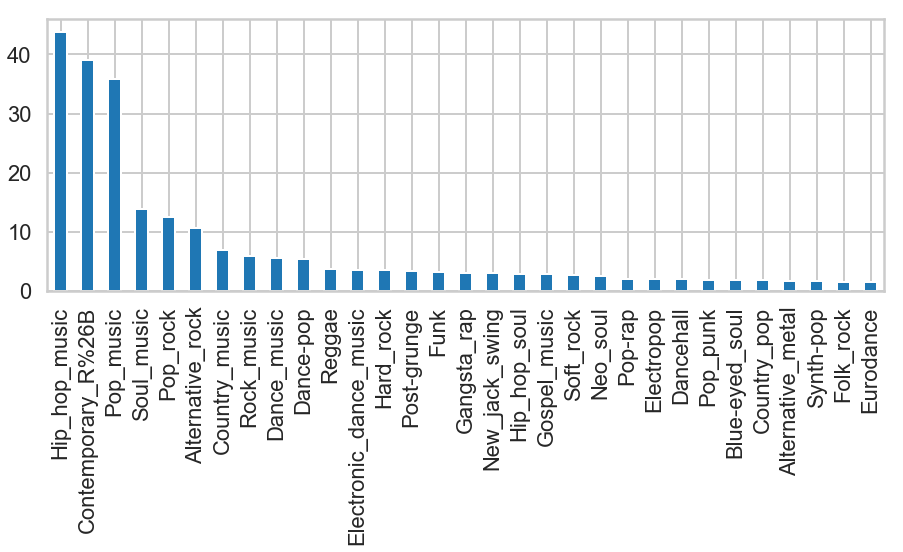

In [158]:
top30 = genrefrac.sort_values(ascending=False)[:31]
top30.plot(rot=90,kind='bar',figsize=(15,5))

Lets take the top 24 genres from `genrefrac`. For each genre, we create a subframe of the ranking and year from those rows for which that genre is "True". We group the resulting dataframe by year. We obtain a dictionary `genreinfo` keyed by genre, whose value is a tuple of 3 Pandas series: the mean rankings per year for that genre, the standard deviation on those rankings, and the series groupby object for the rankings per year.

In [159]:
genreinfo = {}
topgenres = genrefrac.sort_values(ascending=False).index[:24]

for genre in topgenres:
    genreframe = largedf[largedf[str(genre)] == True][['ranking','year']]
    ggby = genreframe.groupby('year')
    genreinfo[genre] = {'meanseries': ggby['ranking'].mean(),
                        'stdseries': ggby['ranking'].std(), 'rankingseries': ggby['ranking']}

In [160]:
topgenres

Index(['Hip_hop_music', 'Contemporary_R%26B', 'Pop_music', 'Soul_music', 'Pop_rock', 'Alternative_rock', 'Country_music', 'Rock_music', 'Dance_music', 'Dance-pop', 'Reggae', 'Electronic_dance_music', 'Hard_rock', 'Post-grunge', 'Funk', 'Gangsta_rap', 'New_jack_swing', 'Hip_hop_soul', 'Gospel_music', 'Soft_rock', 'Neo_soul', 'Pop-rap', 'Electropop', 'Dancehall'], dtype='object')

In [161]:
genreinfo['Pop_music']

{'meanseries': year
 1992    36.764706
 1993    49.269231
 1994    38.428571
 1995    42.333333
 1996    42.718750
 1997    47.121951
 1998    44.125000
 1999    46.844444
 2000    44.809524
 2001    52.121212
 2002    49.571429
 2003    45.722222
 2004    38.640000
 2005    45.086957
 2006    50.177778
 2007    45.576923
 2008    38.500000
 2009    46.220339
 2010    45.240506
 2011    43.986842
 2012    42.269841
 2013    42.152542
 2014    47.180556
 Name: ranking, dtype: float64, 'stdseries': year
 1992    25.329416
 1993    30.696655
 1994    30.132341
 1995    26.664368
 1996    31.280453
 1997    28.754300
 1998    30.036036
 1999    31.011695
 2000    27.453942
 2001    27.117519
 2002    28.446323
 2003    26.457093
 2004    28.533431
 2005    28.743174
 2006    30.661116
 2007    30.809564
 2008    26.761525
 2009    29.444903
 2010    27.226126
 2011    28.882056
 2012    25.566615
 2013    27.007543
 2014    31.041239
 Name: ranking, dtype: float64, 'rankingseries': <pandas

Notice that there are NaN's in the standard deviations. Pandas calculates standard deviations for samples rather than populations, and if there is only 1 item, then the standard deviation calculation involves a division by 0.

#### 3.2 Make a small multiples plot of the 24 most popular genres

Make a 8 row, 3 column small multiples plot with elements like:

![Small Multiple](smmult.png)

You will use `genreinfo`, which we just computed, to make a plot of how the "ranking of a genre" has changed with time. The mean rank achieved by songs in a genre forms the backbone of this plot, with the standard deviation shown, and rankings of all the songs in the genre that year shown as well, at a very low transparency. (Since a song belongs to many genres through the artist, this means that a song may be represented in multiple plots. Again, while not strictly true, this is a simplifying assumption we are making.)

Some instructions for the plot:

1. The blue scatters are all the songs "in" that genre: keep them at a low alpha so one can visually see the density. 
2. The dark red points are the means. You can choose to join them if you like.
3. The light red band uses matplotlib's `fill_between` to fill the area between `mean-std` and `mean+std`. 
4. If the standard deviation is NaN, fill up the entire y dimension with it to give a notion of large impreciseness in the measure.

HINT: Once again, http://nbviewer.ipython.org/github/cs109/content/blob/master/lec_04_wrangling.ipynb may help in creating such a plot.

If you have a better viz for this, by all means go for it!

In [162]:
ginfo=genreinfo['Pop_music']

In [163]:
ginfo['meanseries'].values

array([36.76470588, 49.26923077, 38.42857143, 42.33333333, 42.71875   ,
       47.12195122, 44.125     , 46.84444444, 44.80952381, 52.12121212,
       49.57142857, 45.72222222, 38.64      , 45.08695652, 50.17777778,
       45.57692308, 38.5       , 46.22033898, 45.24050633, 43.98684211,
       42.26984127, 42.15254237, 47.18055556])

In [164]:
ginfo['meanseries'].index

Int64Index([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype='int64', name='year')

In [166]:
l_list = []
for group in ginfo['rankingseries']:
    l_list.append(len(group[1].values))

maxl = max(l_list)

In [167]:
v = np.zeros((maxl, 23))
j = 0
for group in ginfo['rankingseries']: 
    for i in range(len(group[1].values)):
        v[i, j] = group[1].values[i]
    j += 1

In [168]:
for i in range(maxl):
    for j in range(23):
        if v[i, j] == 0:
            v[i,j] = np.nan

In [169]:
tempseries = genreinfo['Funk']['stdseries'].values
tempseries = [t if not np.isnan(t) else 50 for t in tempseries]

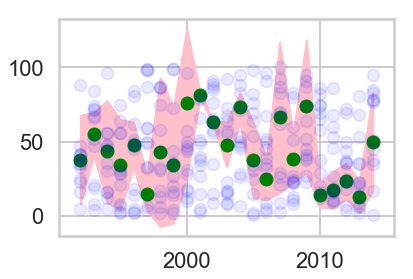

In [176]:
plt.fill_between(np.array(range(1992, 2015)),
                 genreinfo['Funk']['meanseries'].values -
                 tempseries, genreinfo['Funk']['meanseries'].values +
                 tempseries, color="pink")
plt.scatter(genreinfo['Funk']['meanseries'].index,
            genreinfo['Funk']['meanseries'].values, color='green')
[plt.scatter(np.array(range(1992, 2015)), v[i],
             color='blue', alpha=0.08) for i in range(12)]
plt.show()

### Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

What do we mean by highest quality? This is of-course open to interpretation, but lets define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If they appear twice in a year(for different songs), this is counted as two appearances, not one. We cut our chart of at those singers who have appeared more than 15 times.

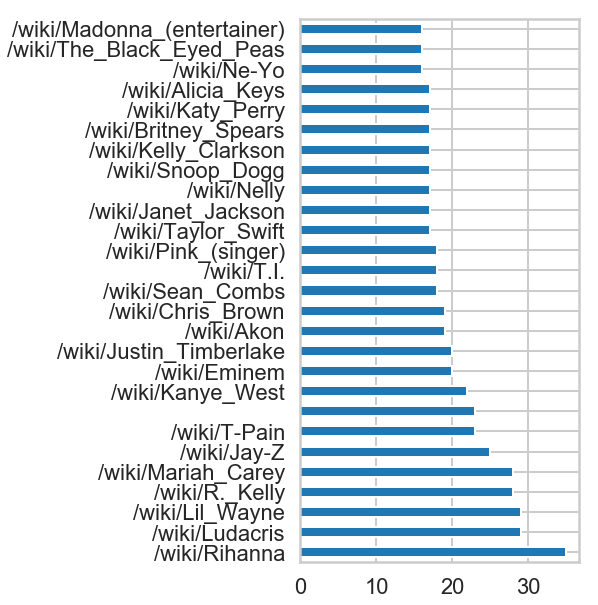

In [177]:
prolific = flatframe.url.value_counts()
plt.figure(figsize=(5, 10))
prolific[prolific > 15].plot(kind="barh")

#### 3.3 What if we used a different metric?

What we would like to capture is this: a singer ought to be scored higher if he or she appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking. 

To do this, group all of a singers songs together and assign each song a score `101 - ranking`. Order the singers by their total score and make a bar chart for the top 20.

In [179]:
flatframe.head()

,year,band_singer,ranking,song,songurl,url
0,1992,Boyz II Men,1.0,End of the Road (Boyz II Men song),/wiki/End_of_the_Road_(Boyz_II_Men_song),/wiki/Boyz_II_Men
598,1992,The New Power Generation,25.0,Diamonds and Pearls (song),/wiki/Diamonds_and_Pearls_(song),/wiki/The_New_Power_Generation
1334,1992,Genesis,55.0,I Can't Dance,/wiki/I_Can%27t_Dance,/wiki/Genesis_(band)
782,1992,Nirvana,32.0,Smells Like Teen Spirit,/wiki/Smells_Like_Teen_Spirit,/wiki/Nirvana_(band)
1311,1992,Michael Bolton,54.0,When a Man Loves a Woman (song),/wiki/When_a_Man_Loves_a_Woman_(song),/wiki/Michael_Bolton


In [180]:
tframe = flatframe[['url','ranking', 'songurl']].copy()

tframe['score'] = 101 - tframe['ranking']

tframe.head()

,url,ranking,songurl,score
0,/wiki/Boyz_II_Men,1.0,/wiki/End_of_the_Road_(Boyz_II_Men_song),100.0
598,/wiki/The_New_Power_Generation,25.0,/wiki/Diamonds_and_Pearls_(song),76.0
1334,/wiki/Genesis_(band),55.0,/wiki/I_Can%27t_Dance,46.0
782,/wiki/Nirvana_(band),32.0,/wiki/Smells_Like_Teen_Spirit,69.0
1311,/wiki/Michael_Bolton,54.0,/wiki/When_a_Man_Loves_a_Woman_(song),47.0


In [181]:
gr = tframe.groupby('url')

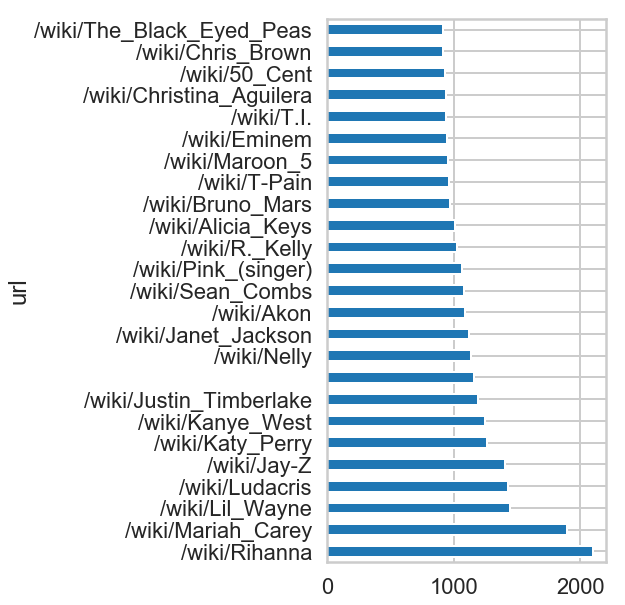

In [182]:
tmp = gr['score'].sum()
scored = tmp.sort_values(ascending=False)[:25]
plt.figure(figsize=(5,10))
scored.plot(kind="barh")

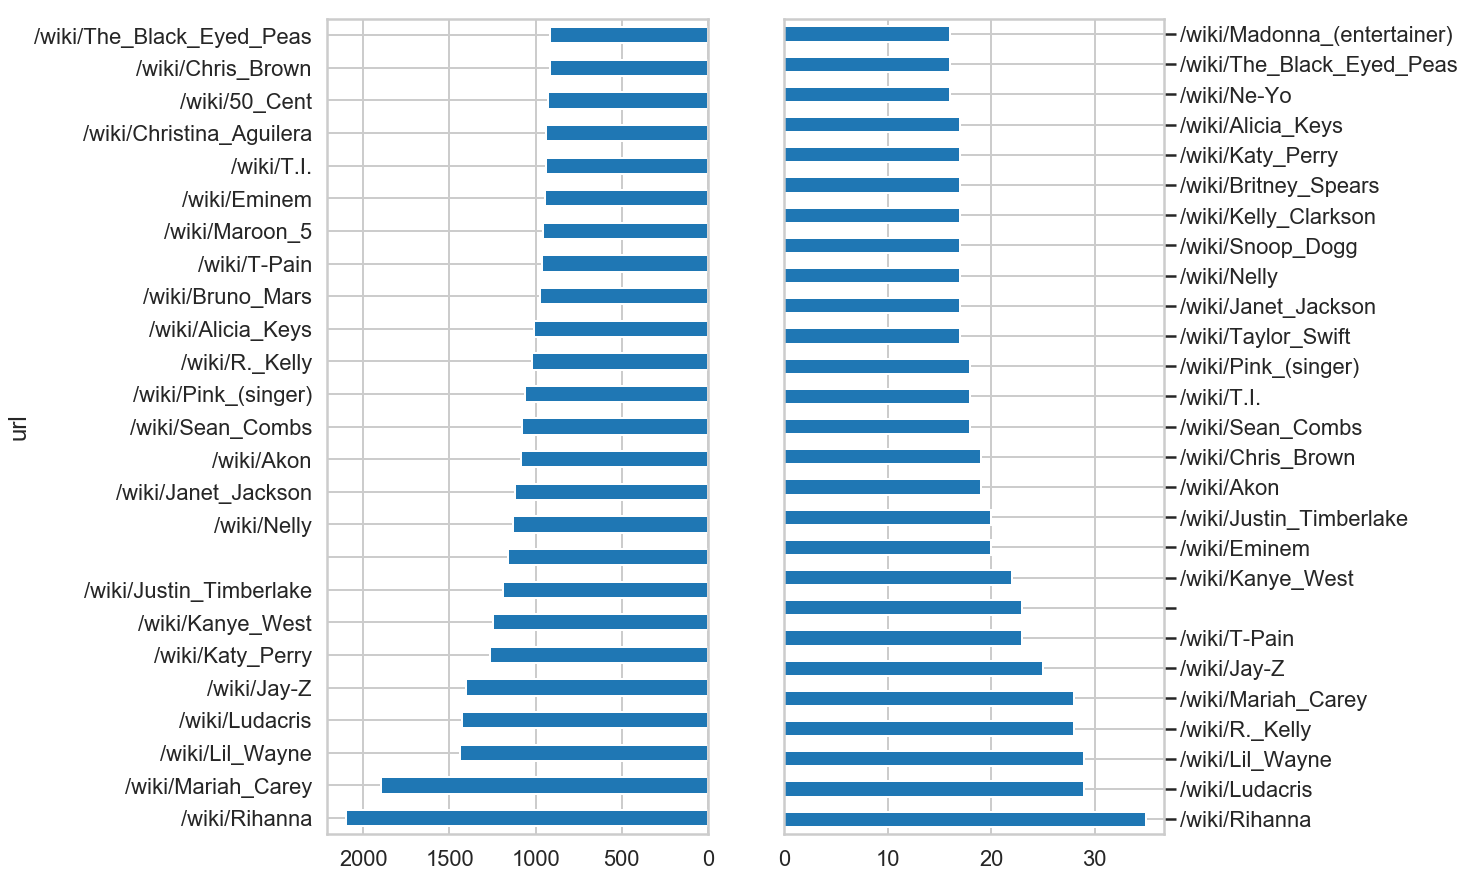

In [183]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,15))

ax.invert_xaxis()
ax2.yaxis.tick_right()

scored.plot(kind='barh', ax=ax)
prolific[prolific > 15].plot(kind='barh',ax=ax2)

#### The age at which singers achieve their top ranking.

As an example to warm you up for the next question, we plot a histogram of the age at which singers achieve their top ranking

In [206]:
t_df = largedf.loc[largedf['born']!=0, :]

2940

In [220]:
t_df = t_df.loc[~t_df['born'].str.contains('–'), :]

In [221]:
dfb = t_df.loc[:, ['year', 'born', 'ranking', 'url']]
dfb['byear'] = dfb.born.apply(lambda x: int(x.split('-')[0]) if x!=0 else x)
byurl = dfb.groupby('url')
frames = []
for k, v in byurl:
    minr = v.ranking.min()
    frames.append(v[v.ranking==minr])
topscoresdf = pd.concat(frames)

/home/anton/anaconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


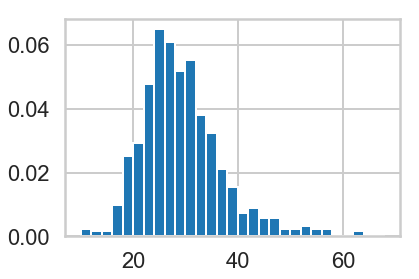

In [222]:
(topscoresdf.year.astype(int) - 
 topscoresdf.byear).hist(bins=np.arange(10,70,2), normed=True);

The *age of first fame* has an interesting shape, unimodal with a mode in the late 20s with a long tail to the right. This makes sense because there really is a lower age limit to artists but not so much an upper one. So you expect this type of behavior.

#### 3.4 At what year since inception do bands reach their top rankings?

Make a similar calculation to plot a histogram of the years since inception at which bands reach their top ranking

In [188]:
largedf.head()

,year,band_singer,ranking,song,songurl,url,born,genres,ya,Acid_jazz,Acid_rock,Acoustic_music,Acoustic_rock,Active_rock,Adult_contemporary,Adult_contemporary_music,Afrobeat,Alternative_R%26B,Alternative_country,Alternative_dance,Alternative_hip_hop,Alternative_metal,Alternative_music,Alternative_pop,Alternative_rock,Ambient_music,Americana_(music),Anarcho-punk,Anti-folk,Arena_rock,Art_pop,Art_rock,Avant-garde_music,Avant-pop,Bachata_(music),Baroque_pop,Bass_music,Bhangra_(music),Big_room_house,Blue-eyed_soul,Blue_comedy,Bluegrass_music,Blues,Blues_music,Blues_rock,Bounce_music,Breakbeat,British_soul,Britpop,Broadway_theatre,...,Ska,Ska_music,Ska_punk,Skate_punk,Sketch_comedy,Smooth_jazz,Snap_music,Soca_music,Soft_rock,Sophisti-pop,Soul_music,Soul_rock,Southern_Hip_Hop,Southern_hip_hop,Southern_rock,Space_rock,Spoken_word,Surreal_humor,Swing_music,Synth-pop,Synthpop,Synthwave_(2000s_genre),Tech_house,Techno,Teen_pop,Tejano_music,Texas_country,Thrash_metal,Traditional_pop_music,Trance_music,Trap_music,Trap_music_(EDM),Trap_music_(hip_hop),Trip_hop,Tropical_music,UK_funky,UK_garage,Urban_adult_contemporary,Urban_contemporary,Urban_contemporary_gospel,Vocal_jazz,Wagnerian_rock,West_Coast_Hip_Hop,West_Coast_hip_hop,West_coast_hip_hop,Western_swing,Wikipedia:Citation_needed,World_music,Worldbeat,Worship_music
0,1992,Boyz II Men,1.0,End of the Road (Boyz II Men song),/wiki/End_of_the_Road_(Boyz_II_Men_song),/wiki/Boyz_II_Men,0,"[Contemporary_R%26B, Soul_music, New_jack_swing]",1985-present,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1992,Boyz II Men,37.0,It's So Hard to Say Goodbye to Yesterday,/wiki/It%27s_So_Hard_to_Say_Goodbye_to_Yesterday,/wiki/Boyz_II_Men,0,"[Contemporary_R%26B, Soul_music, New_jack_swing]",1985-present,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1992,Boyz II Men,84.0,Uhh Ahh,/wiki/Uhh_Ahh,/wiki/Boyz_II_Men,0,"[Contemporary_R%26B, Soul_music, New_jack_swing]",1985-present,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1993,Boyz II Men,12.0,In the Still of the Night (1956 song),/wiki/In_the_Still_of_the_Night_(1956_song)#Bo...,/wiki/Boyz_II_Men,0,"[Contemporary_R%26B, Soul_music, New_jack_swing]",1985-present,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,F

In [224]:
dfya = largedf[largedf.ya!=False][['year', 'ya', 'ranking', 'url']]
dfya['ya'] = dfya.ya.apply(lambda x: int(x[:4]) if x[:4].isdigit() else 0)
byurl = dfya.groupby('url')
frames = []
for k, v in byurl:
    minr = v.ranking.min()
    frames.append(v[v.ranking==minr])
topscoresdf = pd.concat(frames)

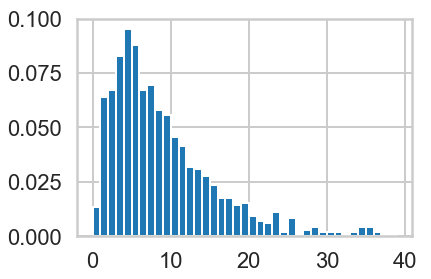

In [225]:
(topscoresdf.year.astype(int) - 
 topscoresdf.ya.astype(int)).hist(bins=np.arange(0,40,1), normed=True);

## Q4: Billboard Magazine: year end results from weekly results

The aim of this problem is to find features in the weekly Billboard top 100 that can predict the end year results. In the interests of time, we'll only do 2014: a complete study would do all the years.
Let us first fetch the end-of-year results.

### Get the end year results, and results from all saturdays of the year.

In [226]:
end_year = requests.get(
    "http://www.billboard.com/charts/year-end/2014/hot-100-songs").text

Billboard releases its daily ratings on saturdays.

We first write a function `allsats(year, fs)` to get all the saturdays in a given year, and given the day part of the date of the first saturday of the year in january. We use the `date` and `timedelta` modules.

In [227]:
from datetime import date, timedelta

def allsats(year, fs):
    days = []
    d = date(year, 1, fs)       
    while d.year == year:
        days.append(d.strftime("%Y-%m-%d"))
        d += timedelta(days = 7)
    return days

The first Saturday in 2014 is Jan 4th:

In [315]:
sats = allsats(2014, 4)
sats[:5]

['2014-01-04', '2014-01-11', '2014-01-18', '2014-01-25', '2014-02-01']

#### Get the data

Let us use `requests` to get the billboard pages for all these days. The format for the data is a dictionary `satdict` with keys the saturday date strings we see above, and one additional key, `end_year`. The values corresponding to the keys are the html text downloaded from billboard. The value corresponding to the `end_year` key comes from the `end_year` variable.

Billboard makes the lists for every saturday available at:
`http://www.billboard.com/charts/hot-100/saturday`, for example, http://www.billboard.com/charts/hot-100/2014-12-27 .

In [318]:
satdict = {}
satdict['end_year'] = end_year
for sat in tqdm(sats):
    satdict[sat] = requests.get(
        "http://www.billboard.com/charts/hot-100/" + sat).text
    time.sleep(2)

We save the output in a file, `satdict.json`.

In [288]:
# with open("tempdata/satdict.json", "w") as fd:
#     json.dump(satdict, fd)

# del satdict

In [320]:
with open("tempdata/satdict.json") as fd:
    satdict = json.load(fd)

#### 4.1 Parse the HTML and save the song information

Write a function `get_weekly(weekstring, indict)` which takes the string corresponding to a saturday, `weekstring` and a dictionary `indict` with *keys* as the saturdays and *value* as the text of the billboard page for that day. Parse the text, returning a list of tuples `(ranking, songdict)` with a `songdict` dictionary. Each tuple corresponds to a song in that week's top-100, with `ranking` the ranking of that song. 

One of these pages looks like this in the developer tools:

![billboard](billboard.png)

Make the dictionary `songdict` look like this: 

`songdict=dict(ranking=ranking, title=title)`

where the title is the title of the song. The `ranking` is the same `ranking` that is the first element of the tuple.

In [262]:
# tmp = requests.get(
#         "https://www.billboard.com/charts/hot-100/2014-12-27", "html")
# tmp = BeautifulSoup(tmp.text, "html")

In [344]:
tmp = satdict[sats[0]]
tmp = BeautifulSoup(tmp, "html")

In [345]:
tbl = tmp.find("div", {"class":"chart-details"})
# the creators changed the code on the website
# tbl = tmp.find("ol", {"class": "chart-list__elements"})

In [346]:
tbl.find_all("div", {"class":"chart-list-item__rank"})[0].get_text(strip=True)
# tbl.find_all("span", {"class":"chart-element__rank__number"})[0].get_text(strip=True)

'1'

In [348]:
len(tbl.find_all("span",{"class":"chart-list-item__title-text"}))
# len(tbl.find_all("span", {"class":"chart-element__rank__number"}))

100

In [375]:
def song_extractor(table):
    # old site version
    ranks = [t.get_text(strip=True) for t in
             table.find_all("div", {"class":
                                    "chart-list-item__rank"})]
#     +[table.find("div", {"class":
#                          "chart-list-item__rank chart-list-item__rank--long"})
#       .get_text(strip=True)]
    # new version
#     ranks = [t.get_text(strip=True) for t in
#              table.find_all("span", {"class":"chart-element__rank__number"})]
    # old site version
    songs = [t.get_text(strip=True) for t in
             table.find_all("span", {"class": "chart-list-item__title-text"})]
    # new version
#     songs = [t.get_text(strip=True) for t in
#              table.find_all(
#                  "span",
#     {"class":
#      "chart-element__information__song text--truncate color--primary"})]

    sdict = dict(zip(ranks, songs))

    tpl = [(r, {r: sdict[r]}) for r in sdict.keys()]

    return tpl

In [376]:
"""
Function
--------
get_weekly

Inputs
------
weekstring: the saturday in question
indict: a dictionary with keys being saturdays, and values being the billboard html associated
with those saturdays
   
Returns
-------
A list of tuples. Each tuple has two elements. The first element is the ranking. The
second is a dictionary songdict with keys
    ranking: ranking of song. same as first element of the tuple
    title: title of song


Notes
-----
See description above.
"""
def get_weekly(weekstring, indict):

    tmp = BeautifulSoup(indict[weekstring],"html")

    tbl = tmp.find("div", {"class":"chart-details"})
    # new site version
#     tbl = tmp.find("ol", {"class": "chart-list__elements"})
    
    tups=song_extractor(tbl)
    
    return tups

In [377]:
get_weekly('2014-01-04', satdict)

[('1', {'1': 'The Monster'}),
 ('2', {'2': 'Timber'}),
 ('3', {'3': 'Counting Stars'}),
 ('4', {'4': 'Say Something'}),
 ('5', {'5': 'Royals'}),
 ('6', {'6': 'Demons'}),
 ('7', {'7': 'Let Her Go'}),
 ('8', {'8': 'Wake Me Up!'}),
 ('9', {'9': 'Wrecking Ball'}),
 ('10', {'10': 'Story Of My Life'}),
 ('11', {'11': 'Roar'}),
 ('12', {'12': 'Drunk In Love'}),
 ('13', {'13': "Hold On, We're Going Home"}),
 ('14', {'14': 'Dark Horse'}),
 ('15', {'15': 'Burn'}),
 ('16', {'16': 'Do What U Want'}),
 ('17', {'17': 'Sweater Weather'}),
 ('18', {'18': 'Team'}),
 ('19', {'19': 'White Walls'}),
 ('20', {'20': '23'}),
 ('21', {'21': 'Pompeii'}),
 ('22', {'22': 'Stay The Night'}),
 ('23', {'23': 'Unconditionally'}),
 ('24', {'24': 'My Hitta'}),
 ('25', {'25': 'Applause'}),
 ('26', {'26': 'All I Want For Christmas Is You'}),
 ('27', {'27': 'Blurred Lines'}),
 ('28', {'28': 'Holy Grail'}),
 ('29', {'29': 'Show Me'}),
 ('30', {'30': 'Stay'}),
 ('31', {'31': 'Radioactive'}),
 ('32', {'32': 'Love More'}),
 

#### parsing endyear results separately

In [378]:
tmp = requests.get("https://www.billboard.com/charts/year-end/2014/hot-100-songs")

tmp = BeautifulSoup(tmp.text,"html")

In [379]:
song_ye = [t.get_text(strip=True) for t in
           tmp.find_all("div", {"class": "ye-chart-item__title"})]

rank_ye = [int(t.get_text(strip=True)) for t in
           tmp.find_all("div", {"class": "ye-chart-item__rank"})]

In [380]:
ye_dict = dict(zip(rank_ye, song_ye))

ye_tuple = [(r, {r: ye_dict[r]}) for r in rank_ye]

Let's process the weekly and year-end information using the function you just defined. We create a `weekinfo` list with the above function run for each week. We also store in the variable `yearend` the results of running the function for the end of year rankings. We `zip` the `weekinfo` together with the saturdays to create a list of tuples `weektuples`.

In [408]:
weekinfo = []
for k in tqdm(sats):
    weekinfo.append(get_weekly(k, satdict))

weektuples = zip(sats, weekinfo)

In [409]:
yearend = ye_tuple

---

Here we write a function `get_for_title(weektups)` that takes the tuples created above and returns a dictionary `titles` whose *key* is the title of the song, and whose *value* is a list of tuples, the members of which are (`weekindex`, `ranking`). The `weekindex` starts at 1 for the first week of the year, and `ranking` is the ranking achieved that week. 

In [410]:
def get_for_title(weektups):
    titles = {}
    weekindex = 1
    for weekdate, weeksrankings in weektups:
        # iterate over the week's top-100
        for rankingtuple in weeksrankings:
            ranking = rankingtuple[0]
            weekdict = rankingtuple[1]
#             if not titles.has_key(weekdict['title']):
            for title in weekdict.keys():
                if weekdict[title] not in titles:
                    titles[weekdict[title]] = []
                else:
                    titles[weekdict[title]].append((weekindex, ranking))
        weekindex = weekindex + 1
    return titles

In [411]:
titles = get_for_title(weektuples)

Now let's create a dictionary keyed by the lower-cased title where we store the rank means (`rankmean`), rank standard deviations (`rankstd`) and rank count, the number of times(weeks) it appeared in the rankings in 2014, (`ranklen`), for a song.

In [413]:
tdict = {}
for title in titles.keys():
    wtlist = titles[title]
    weeks = [int(e[0]) for e in wtlist]
    ranks = [int(e[1]) for e in wtlist]

    rankmean = np.mean(ranks)
    # numpy standard deviation is population based, make it sample based
    rankstd = np.std(ranks)
    ranklen = len(ranks)
    tdict[title.lower()] = {'ranks': (rankmean, rankstd, ranklen)}

### Get winning songs, and see how they do in all these weeks

Now we create a list of winners whose elements are `dict(title, winner=1, ranking=year-end-ranking, rankmean=mean over weeks, rankstd=stddev over weeks, weekson=ranklen)`. To make this, we go to the songs that are in the top 100 at years-end and pick up their information from `tdict` above.

In [415]:
yearend[:5]

[(1, {1: 'Happy'}),
 (2, {2: 'Dark Horse'}),
 (3, {3: 'All Of Me'}),
 (4, {4: 'Fancy'}),
 (5, {5: 'Counting Stars'})]

In [416]:
winners = []
for yt in yearend:
    r, d = yt
    title = d[r].lower()
    if title in tdict.keys():
        rvals = tdict[title]['ranks']
    else:
        rvals = [0, 0, 0]

    winners.append(dict(title=title, winner=1,
                        ranking=r, rankmean=rvals[0],
                        rankstd=rvals[1], weekson=rvals[2]))

And we use this list of dictionaries to create a dataframe `winners2014` with al the information gathered.

In [418]:
winners2014 = pd.DataFrame(winners)
winners2014.head(20)

,ranking,rankmean,rankstd,title,weekson,winner
0,1,16.326087,15.673370,happy,46,1
1,2,14.279070,14.744846,dark horse,43,1
2,3,17.187500,16.902485,all of me,48,1
3,4,22.578947,24.568520,fancy,38,1
4,5,21.121951,14.862287,counting stars,41,1
5,6,15.937500,18.031115,talk dirty,32,1
6,7,15.909091,15.368925,rude,33,1
7,8,5.863636,11.921316,all about that bass,22,1
8,9,11.833333,12.746459,problem,24,1
9,10,21.250000,25.789075,stay with me,36,1


#### 4.2 Plot the mean rank(y axis) against the final, year-end rank(x-axis)

Show a 45 degree line for comparison. Use `plt.errorbar` to show the standard deviation along with the mean rank.

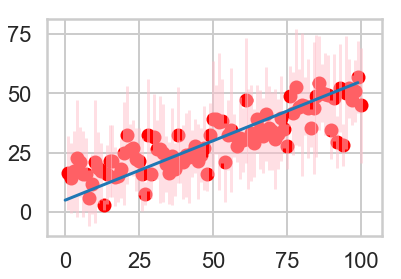

In [419]:
plt.plot(np.arange(0, 100, 1), np.arange(0, 50, 0.5)+5)

plt.errorbar(winners2014.ranking, winners2014.rankmean,
             yerr=winners2014.rankstd, color="pink", fmt="none", alpha=0.5)
plt.scatter(winners2014.ranking, winners2014.rankmean, color="red")

### Add losers in and see what features may be used to distinguish winners from losers

Let's create a list `losers` of dictionaries, one for each song from the weekly lists that did not make it to the year end list. The dictionaries are identical to the dictionaries in the `winners` list, but we code the `ranking` as -1 for losers and set `winner` to 0. Thus

In [420]:
winlist = [e['title'] for e in winners]
losers = []
for title in tdict:
    if not title in winlist:
        rvals = tdict[title]['ranks']
        losers.append(dict(title=title, winner=0,
                           ranking=-1, rankmean=rvals[0],
                           rankstd=rvals[1], weekson=rvals[2]))

We create a `losers2014` dataframe... 

In [421]:
losers2014 = pd.DataFrame(losers)
losers2014.head(10)

,ranking,rankmean,rankstd,title,weekson,winner
0,-1,57.363636,23.487996,unconditionally,11,0
1,-1,34.250000,9.120718,applause,4,0
2,-1,45.000000,5.000000,all i want for christmas is you,2,0
3,-1,35.000000,5.887841,holy grail,3,0
4,-1,53.700000,18.066820,stay,10,0
5,-1,42.750000,2.384848,love more,4,0
6,-1,38.666667,6.944222,gas pedal,3,0
7,-1,41.461538,11.751369,drink a beer,13,0
8,-1,49.375000,1.494783,it won't stop,8,0
9,-1,46.000000,4.869732,all me,7,0


...and concatenate the losers and winners into one dataframe.

In [431]:
all2014 = pd.concat([winners2014, losers2014])
all2014.head(20)

,ranking,rankmean,rankstd,title,weekson,winner
0,1,16.326087,15.673370,happy,46,1
1,2,14.279070,14.744846,dark horse,43,1
2,3,17.187500,16.902485,all of me,48,1
3,4,22.578947,24.568520,fancy,38,1
4,5,21.121951,14.862287,counting stars,41,1
5,6,15.937500,18.031115,talk dirty,32,1
6,7,15.909091,15.368925,rude,33,1
7,8,5.863636,11.921316,all about that bass,22,1
8,9,11.833333,12.746459,problem,24,1
9,10,21.250000,25.789075,stay with me,36,1


#### 4.3 Make a scatterplot matrix of these features, color coded by winners/losers

Use `sns.pairplot`. Use all the numerical features(4), with the exception of `winner`, which you will use to give a different color to winners and losers. This will be a 4x4 matrix, with different colored dots for winners and losers off diagonal, and a 2 histograms on diagonal. The histogram shows the distribution of the one feature on the diagonal for both the winners and losers.

In [423]:
all_cl = all2014.loc[:, "ranking":"weekson"]
all_cl.head()

,ranking,rankmean,rankstd,title,weekson
0,1,16.326087,15.673370,happy,46
1,2,14.279070,14.744846,dark horse,43
2,3,17.187500,16.902485,all of me,48
3,4,22.578947,24.568520,fancy,38
4,5,21.121951,14.862287,counting stars,41


In [428]:
all2014.to_csv("tempdata/all2014.csv")

del all2014

In [ ]:
all2014 = pd.read_csv("tempdata/all2014.csv")

In [432]:
all2014.head()

,ranking,rankmean,rankstd,title,weekson,winner
0,1,16.326087,15.673370,happy,46,1
1,2,14.279070,14.744846,dark horse,43,1
2,3,17.187500,16.902485,all of me,48,1
3,4,22.578947,24.568520,fancy,38,1
4,5,21.121951,14.862287,counting stars,41,1


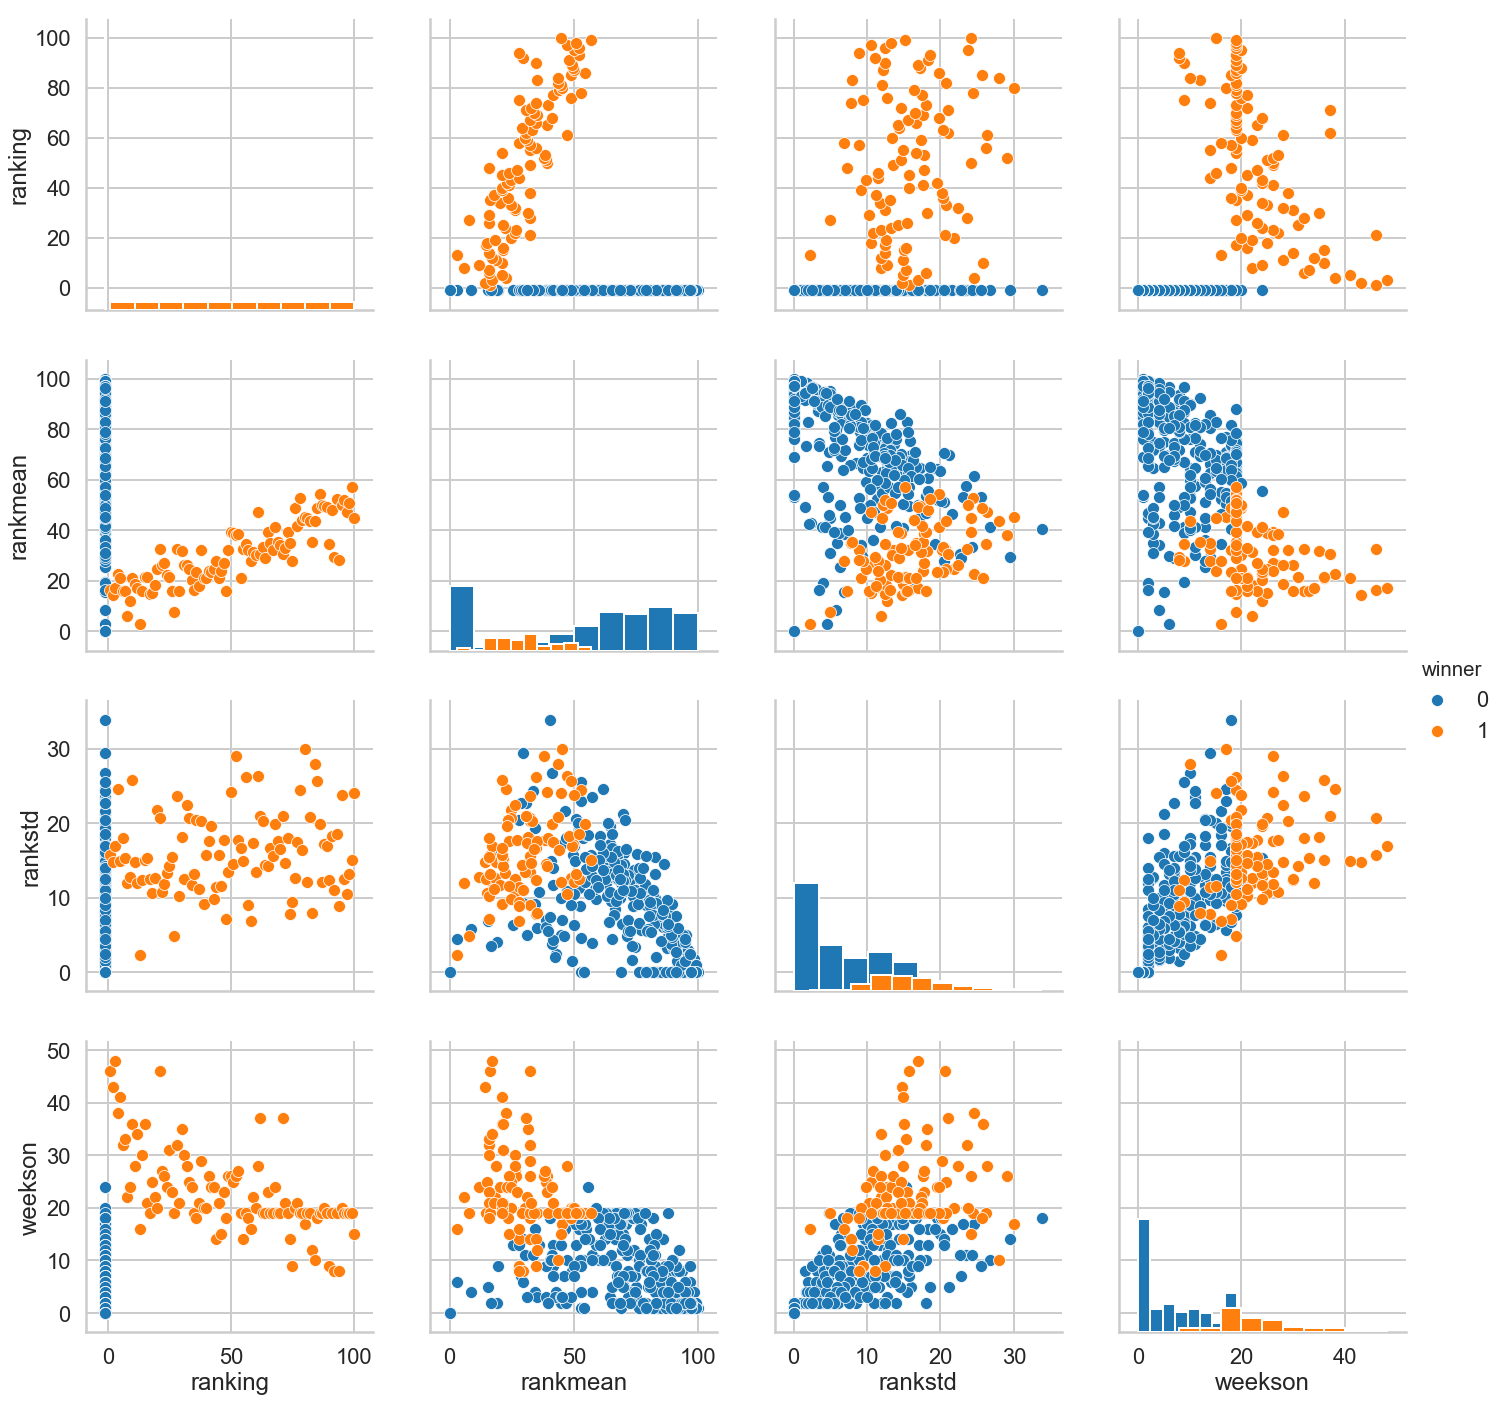

In [433]:
sns.pairplot(all2014.replace(np.nan, 0), hue="winner",
             diag_kind="hist",
             vars=["ranking", "rankmean", "rankstd", "weekson"],
             height=5)